In [237]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

In [238]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [239]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [240]:
stay = churn_data['Exited']
stay.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

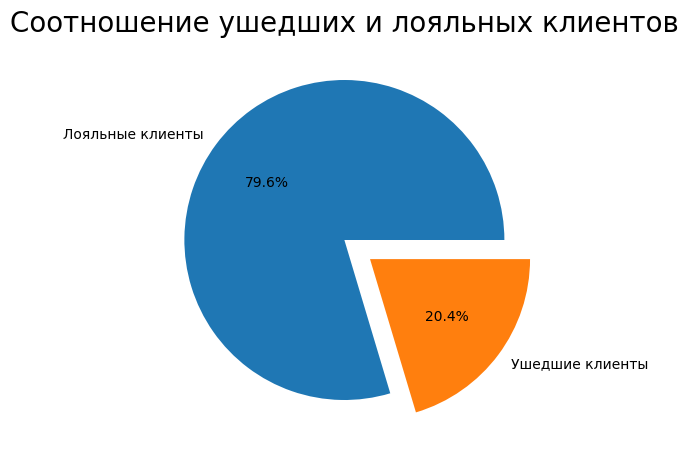

In [241]:
# Задание 9.1
total_exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(4, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    total_exited,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты', ],
    autopct='%.1f%%',
    explode = [0, 0.2]
    

);
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize = 20);

In [242]:
# По графику выше видно, что число лояльных клиентов больше чем ушедших в 4 раза.

260341.64

250898.09

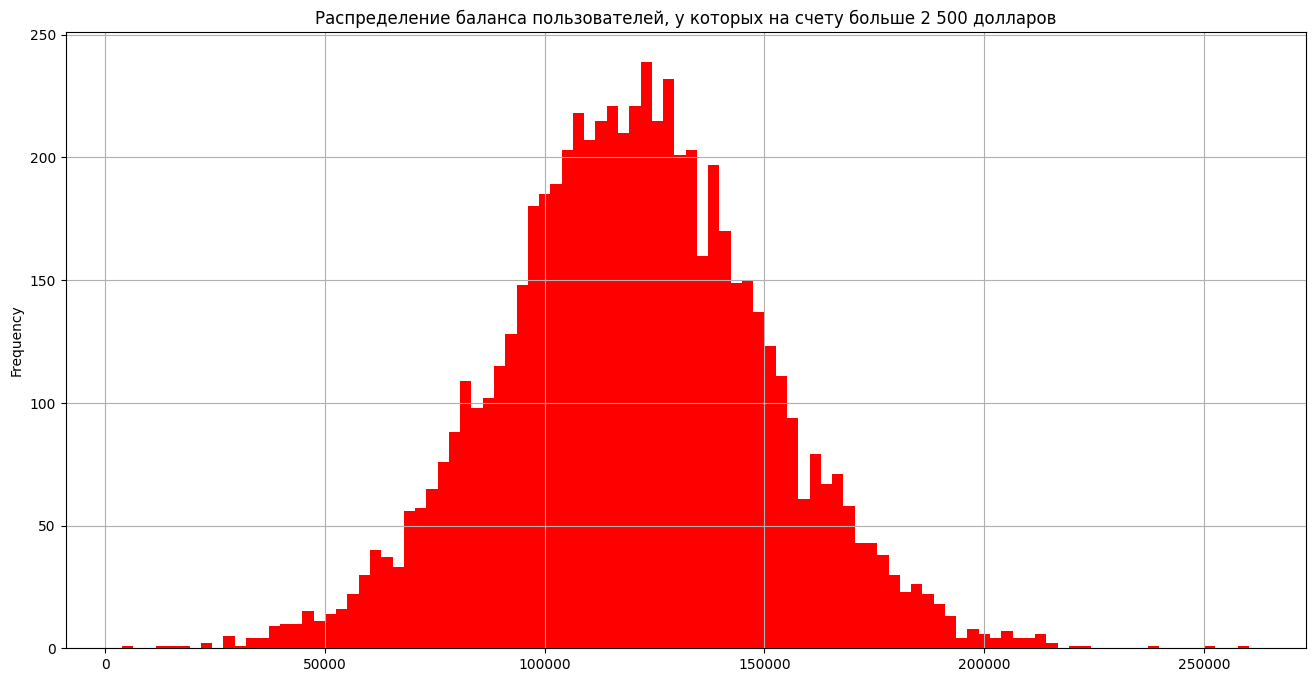

In [243]:
# Задание 9.2
mask = churn_data['Balance'] > 2500
balance_distribution = churn_data[mask].sort_values(by='Balance',ascending=True)
balance_distribution = balance_distribution.groupby('Balance')['Balance'].sum()
display(balance_distribution.max())
display(churn_data['Balance'].max())
balance_distribution.plot(
    kind= 'hist',
    figsize= (16, 8),
    grid=True,
    bins = 100, 
    #range=(250000, 261000), 
    color = 'red', 
    title= 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
);


In [ ]:
# Подавялющее большинство клиентов больше 50тыс, и меьнше 200тыс. И т.д.

250898.09
260341.64
Balance
3768.69        3768.69
12459.19      12459.19
14262.80      14262.80
16893.59      16893.59
23503.31      23503.31
               ...    
216109.88    216109.88
221532.80    221532.80
222267.63    222267.63
238387.56    238387.56
250898.09    250898.09
Name: Balance, Length: 6381, dtype: float64


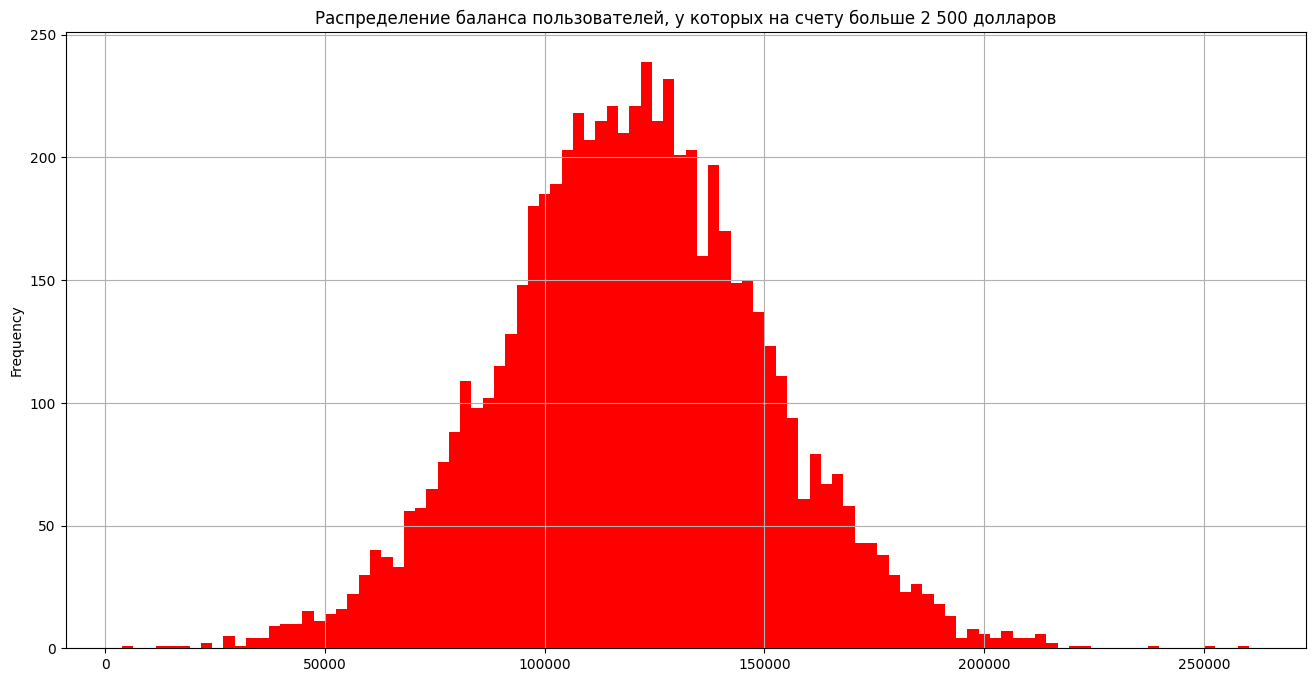

In [254]:
mask = churn_data['Balance'] > 2500
balance_distribution = churn_data[mask].sort_values(by='Balance',ascending=True)
balance_distribution = balance_distribution.groupby('Balance')['Balance'].sum()
print(churn_data['Balance'].max())
print(balance_distribution.max())
print(balance_distribution)
balance_distribution.plot(
    kind= 'hist',
    figsize= (16, 8),
    grid=True,
    bins = 100, 
    #range=(250000, 261000), 
    color = 'red', 
    title= 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
);


In [ ]:
balance_distribution.describe()

count      6381.000000
mean     119865.051384
std       30171.060719
min        3768.690000
25%      100169.510000
50%      119852.010000
75%      139532.340000
max      260341.640000
Name: Balance, dtype: float64